<div style="align-items: center; justify-content: space-between;">
   
   <h1>Data Pipeline | AWS - Telegram</h1>
   <b> por <a href="https://www.linkedin.com/in/fernandohcarneiro/">Lorran daudosso</a></b>
   <br><br>
  

</div>

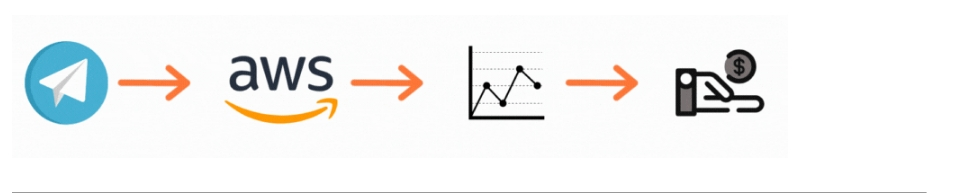

---
## Sumário
#### 1. [**Introdução**](#intro)  
    1.1 Objetivo  
    1.2 O que é Pipeline?  
    1.3 Pipeline do projeto  
#### 2. [**Sistema transacional**](#sistrans)  
    2.1 Ingestão de dados  
    2.2 O que é uma API?   
    2.3 Telegram Botfather
    2.4 AWS API Gateway  
    2.5 Webhook  
     
#### 3. [**Sistema analítico**](#sisanal)  
    3.1 O que é ETL (Extraction, Transformation, Loading)?  
    3.2 Extração (Extraction)    
        3.2.1 AWS Lambda  
        3.2.2 AWS S3  
    3.3 Transformação (Transformation)  
    3.4 Carregamento (Loading)    
        3.4.1 AWS Event Bridge  
#### 4. [**Apresentação**](#apres)  
    4.1 AWS Athena  
    4.2 Análise de Dados
#### 5. [**Conclusão**](#conclu)  



# 1. Introdução

### 1.1 Objetivo
O objetivo deste projeto é demonstrar como é feita a extração de dados provenientes do Telegram e do WhatsApp, transferir esses dados para um ***Datalake***, realizar o processamento dos dados em lote na nuvem e então fazer a análise dos dados tratados. Esses dados fornecem a base para extrair informações valiosas, abrindo possibilidades para aprimorar serviços e explorar oportunidades de monetização.



### 1.2 O que é Pipeline?
Um **pipeline** de dados é um sistema que organiza o fluxo de dados desde sua coleta até a análise, transformando dados brutos em informações valiosas para a tomada de decisões de negócios.

**Principais características:**

* **Integração de dados:** Coleta dados de várias fontes (aplicativos, dispositivos IoT, etc.) e os unifica para análise.
* **Transformação de dados:** Limpa, reformata, valida e enriquece os dados para torná-los utilizáveis.
* **Processamento eficiente:** Automatiza tarefas repetitivas, permitindo que os engenheiros de dados se concentrem na análise.
* **Melhora a qualidade dos dados:** Padroniza formatos, remove redundâncias e garante a consistência dos dados.
* **Suporta diferentes tipos de análise:** Permite visualizações de dados, análises exploratórias e machine learning.
* **Tipos de pipelines:** Processamento de fluxo (análise em tempo real) e processamento em lote (tarefas ocasionais de alto volume).

**Em essência:** Um pipeline de dados é como uma "linha de montagem" para informações, onde os dados brutos são refinados e transformados em "produtos acabados" (insights) que impulsionam as decisões de negócios.

*fonte: https://aws.amazon.com/pt/what-is/data-pipeline/*

### 1.3 Pipeline do projeto
O pipeline de dados deste projeto começa com a ingestão dos dados dos usuários por meio de uma *API* que conecta as fontes de dados à nuvem da *Amazon Web Services (AWS)*. Na plataforma da *AWS*, os dados são recebidos por uma função *Lambda*, que os organiza por dias no *AWS S3*. Diariamente, um AWS Event Bridge aciona um processo em lote no serviço *Lambda*, que transforma os dados brutos, extrai apenas as informações relevantes (data da mensagem, nome e número do contato, e a mensagem) e os armazena de maneira organizada no *AWS S3*. No processo de visualização, tabelas criadas a partir dos arquivos *Parquet* gerados no passo anterior possibilitam a realização de análises variadas usando a linguagem *SQL*. É possível extrair esses dados para um *dashboard* posteriormente.

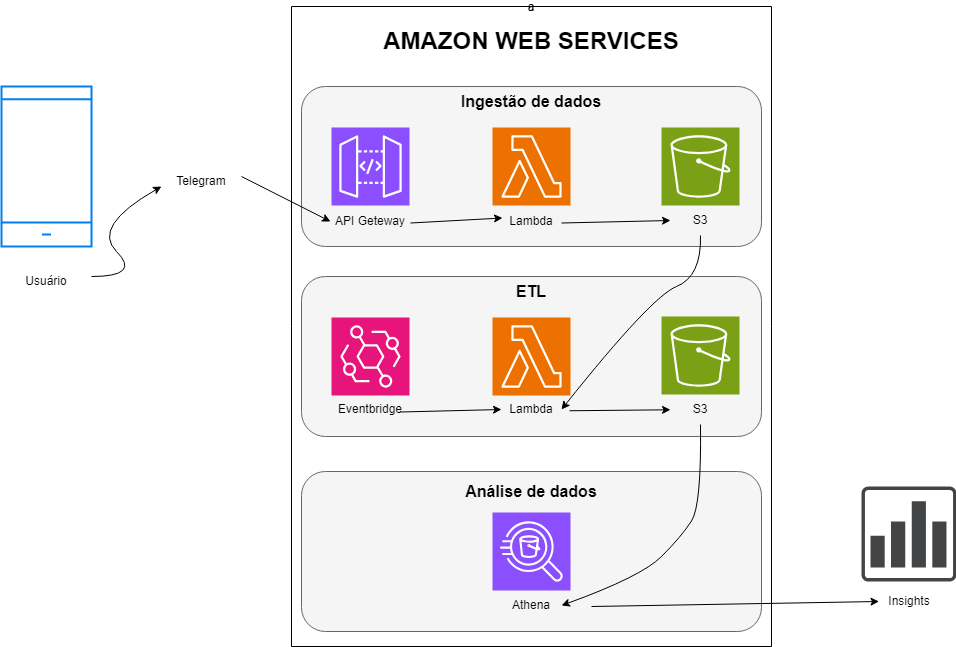

<a id='sistrans'></a>
## 2. Sistema transacional

Um sistema transacional é uma estrutura tecnológica e de dados que suporta as transações diárias de uma fonte de dados. Ele é responsável por coletar, registrar e transmitir dados para uma cadeia de processos que tratarão os dados para posterior análise. Em resumo, os sistemas transacionais são projetados para ingerir dados criados diariamente e salvá-los em um banco de dados ou *DataLake*.

*fonte: https://insightsoftware.com/encyclopedia/transactional-systems/*

### 2.1 Ingestão de dados
Neste projeto a ingestão dos dados consiste na captura de mensagens de texto enviadas pelas plataformas Whatsapp e Telegram em tempo real, fornecidas por meio de uma API.

#### 2.2 O que é uma API?
Uma API é um mecanismo que permite a comunicação entre softwares, como um contrato que define como eles interagem. APIs facilitam a integração, inovação e expansão de sistemas, além de simplificar a manutenção. A arquitetura REST é a mais popular, usando HTTP e operações como GET e PUT. Endpoints são pontos de contato cruciais para segurança e performance. A segurança é garantida por tokens e chaves de API. Criar uma API envolve planejamento, desenvolvimento, testes, documentação e comercialização. Em resumo, APIs são pontes que conectam softwares, impulsionando a inovação e a integração.

*fonte: https://aws.amazon.com/pt/what-is/api/*

#### 2.3 Telegram
Um chatbot é um programa de computador projetado para simular a interação humana em conversas. Neste projeto iremos usar um chatbot para capturar as mensagens enviadas dentro de um grupo. O BotFather é um bot especial no Telegram que faz a criação e gerenciamento de bots na plataforma. Ele nos permitirá desenvolver e configurar o bot de maneira eficiente e interativa.

*Documentação: https://core.telegram.org/bots/features#botfather*


2.3.1 Criação do bot
Na plataforma web do Telegram foi criado um bot a partir do Botfather e dado o nome de modulo42_ebac_bot.

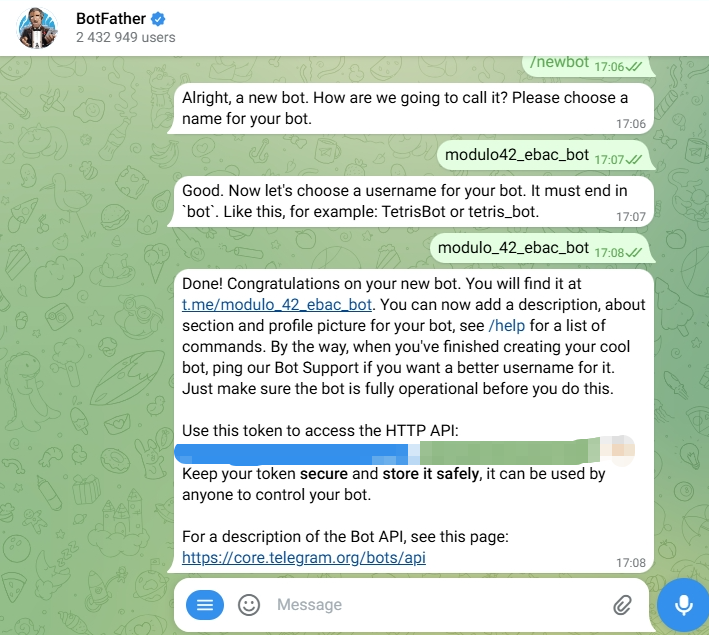

Após a criação do bot, criei um grupo ao qual tenho interesse em captar as interações entre os integrantes. E foi configurado o bot como administrador, permitindo dessa maneira o bot poderá ouvir a conversa de todos os integrantes deste grupo.

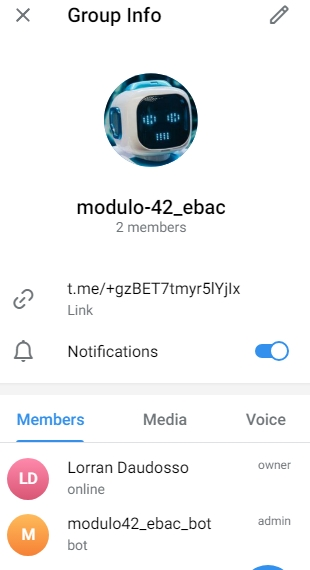

##### 2.4.1 Criação da API para Telegram
Na plataforma API Gateway, foi criada uma nova API com protocolo REST com o método POST configurado com integração do tipo proxy com o serviço *Lambda*

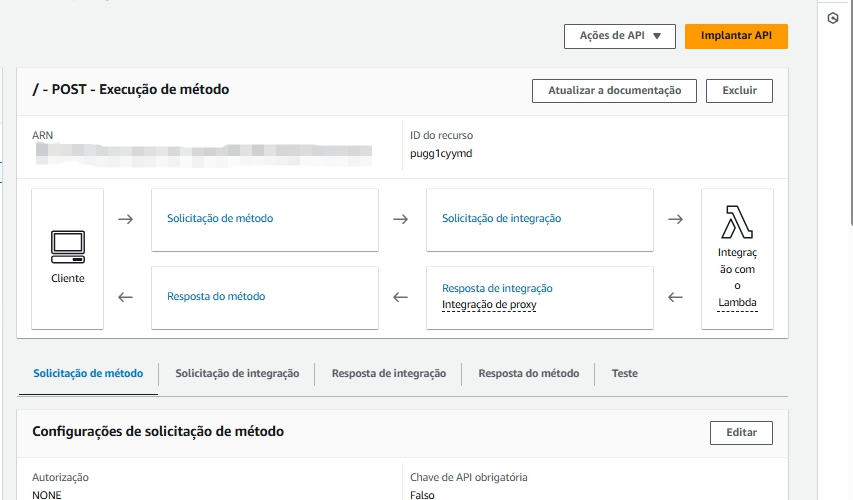

#### 2.5 Webhook
Um webhook é uma ferramenta de comunicação automatizada que permite que sistemas online, geralmente APIs, enviem informações em tempo real assim que eventos específicos ocorrem. Com uma abordagem assíncrona baseada em eventos, opera por meio de protocolos HTTP ou HTTPS, fornecendo uma maneira ágil e eficiente de integrar plataformas e serviços online. No escopo deste projeto, o webhook será acionado pelo recebimento de uma nova mensagem, sendo responsável por encaminhar os dados úteis, também chamado de *payload*,  de forma instantânea aos serviços em nuvem.

*fonte: https://www.redhat.com/en/topics/automation/what-is-a-webhook*

##### 2.5.1 Configuração do Telegram
Para configurar o *Telegram* foi preciso enviar uma requisição GET para acionar o método `setWebhook` e injetar nele o endereço URL adquirido na criação da API do *AWS API Gateway*. Abaixo segue a captura da execução da requisição:


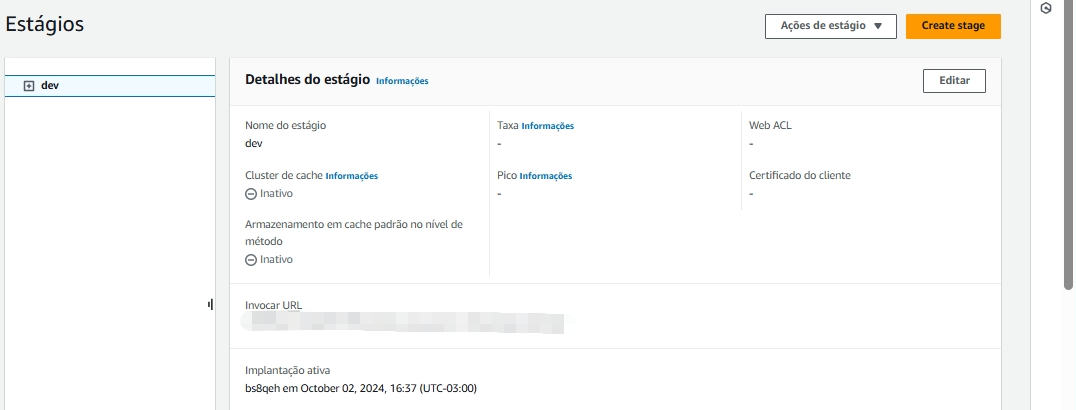

Após configurado o *webhook* foi possível verificar seu funcionamento com o método `getWebhookInfo`: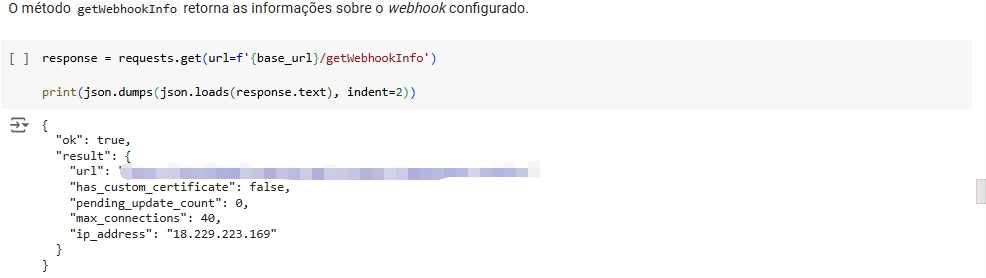

<a id='sisanal'></a>
## 3. Sistema analítico
Esses sistemas apoiam a tomada de decisões, relatórios, consultas e análises. São projetados para lidar com consultas complexas em grandes volumes de dados vindos dos sistemas transacionais, organizam esses dados e os processam de maneira a criar insights úteis. Neste projeto o sistema compreende a retirada dos dados brutos (*raw*) do datalake, a transformação deles em informação e a análise em busca de padrões e insights.

*fonte: http://bi-insider.com/posts/types-of-enterprise-data-transactional-analytical-master/*

### 3.1 O que é ETL (Extraction, Transformation, Loading)?
É o processo de extrair, limpar e organizar os dados de uma origem para serem carregados, ou armazenados, em um local específico. Essa etapa é crucial para assegurar que os dados estejam em uma forma apropriada e prontos para análise antes de serem empregados em relatórios, visualizações ou em outros procedimentos analíticos.

 *fonte: https://www.ibm.com/topics/etl*

### 3.2 Extração (Extraction)
Envolve a extração, ou coleta, de dados brutos de diferentes fontes, como as APIs neste caso.

#### 3.2.1 AWS Lambda
O AWS Lambda é um serviço de computação que permite a execução de código sem a necessidade de gerenciar servidores, também chamado de *serverless*. Nela é possível criar funções sem se preocupar com o escalamento e infraestrutura subjacente. Neste projeto ela se encarregará de executar scripts na linguagem *Python* para manuseio e transformação dos dados.

*fonte: https://docs.aws.amazon.com/lambda/latest/dg/welcome.html*

#### 3.2.2 AWS S3
O *Amazon S3*, ou *Simple Storage Service*, é um serviço de armazenamento que permite armazenar e recuperar dados de maneira fácil e escalável. É amplamente utilizado para armazenar arquivos, fazer backup e hospedar sistemas online, proporcionando uma solução eficiente e confiável para necessidades de armazenamento na nuvem. Neste projeto, ele armazenará tanto os dados brutos servindo como *Datalake*, quanto os dados transformados e prontos para análise.

*fonte: https://docs.aws.amazon.com/AmazonS3/latest/userguide/Welcome.html*

##### 3.2.3 Extração Telegram
Abaixo segue o script em Python usado para a extração dos dados do Telegram.

```python
import os
import json
import logging
from datetime import datetime, timezone

import boto3


def lambda_handler(event: dict, context: dict) -> dict:

  '''
  Recebe uma mensagens do Telegram via AWS API Gateway, verifica no
  seu conteúdo se foi produzida em um determinado grupo e a escreve,
  em seu formato original JSON, em um bucket do AWS S3.
  '''

  # vars de ambiente

  BUCKET = os.environ['AWS_S3_BUCKET']
  TELEGRAM_CHAT_ID = int(os.environ['TELEGRAM_CHAT_ID'])

  # vars lógicas

  tzinfo = timezone(offset=timedelta(hours=-3))
  date = datetime.now(tzinfo).strftime('%Y-%m-%d')
  timestamp = datetime.now(tzinfo).strftime('%Y%m%d%H%M%S%f')

  filename = f'{timestamp}.json'

  # código principal

  client = boto3.client('s3')

  try:

    message = json.loads(event["body"])
    chat_id = message["message"]["chat"]["id"]

    if chat_id == TELEGRAM_CHAT_ID:

      with open(f"/tmp/{filename}", mode='w', encoding='utf8') as fp:
        json.dump(message, fp)

      client.upload_file(f'/tmp/{filename}', BUCKET, f'telegram/context_date={date}/{filename}')

  except Exception as exc:
      logging.error(msg=exc)
      return dict(statusCode="500")

  else:
      return dict(statusCode="200")
```

> Note que a extração dos dados provenientes da API em formato JSON são direcionados para um endereço na web armazenado na variável BUCKET. Este é o nome do espaço de armazenamento do serviço AWS S3 para onde estamos enviando os dados brutos. Na sequência será explanado a etapa seguinte, a de transformação dos dados extraídos.

### 3.3 Transformação (Transformation)
Nesta etapa, os dados coletados são processados e transformados para atender aos requisitos do destino. Isso inclui limpeza, filtragem, agregação e qualquer manipulação necessária.

#### 3.3.1 Transformação Telegram (Lambda)
O script abaixo, de forma similar, recebe os dados brutos de um *bucket* e retira dele somente as informações de interesse, devolvendo o dado estruturado no formato de tabela *parquet*. A diferença entre os scripts da plataforma *Whatsapp* e *Telegram* é basicamente a estrutura em que o dado é recebido via *API*, sendo o do *Whatsapp* maior e com mais aninhamento entre itens.

```python
import os
import json
import logging
from datetime import datetime, timedelta, timezone

import boto3
import pyarrow as pa
import pyarrow.parquet as pq


def lambda_handler(event: dict, context: dict) -> bool:

  '''
  Diariamente é executado para compactar as diversas mensagensm, no formato
  JSON, do dia anterior, armazenadas no bucket de dados cru, em um único
  arquivo no formato PARQUET, armazenando-o no bucket de dados enriquecidos
  '''

  # vars de ambiente

  RAW_BUCKET = os.environ['AWS_S3_BUCKET']
  ENRICHED_BUCKET = os.environ['AWS_S3_ENRICHED']

  # vars lógicas

  tzinfo = timezone(offset=timedelta(hours=-3))
  date = (datetime.now(tzinfo) - timedelta(days=1)).strftime('%Y-%m-%d')
  timestamp = datetime.now(tzinfo).strftime('%Y%m%d%H%M%S%f')

  # código principal

  table = None
  client = boto3.client('s3')

  try:

      response = client.list_objects_v2(Bucket=RAW_BUCKET, Prefix=f'telegram/context_date={date}')

      for content in response['Contents']:

        key = content['Key']
        client.download_file(RAW_BUCKET, key, f"/tmp/{key.split('/')[-1]}")

        with open(f"/tmp/{key.split('/')[-1]}", mode='r', encoding='utf8') as fp:

          data = json.load(fp)
          data = data["message"]

        parsed_data = parse_data(data=data)
        iter_table = pa.Table.from_pydict(mapping=parsed_data)

        if table:

          table = pa.concat_tables([table, iter_table])

        else:

          table = iter_table
          iter_table = None
          
      pq.write_table(table=table, where=f'/tmp/{timestamp}.parquet')
      client.upload_file(f"/tmp/{timestamp}.parquet", ENRICHED_BUCKET, f"telegram/context_date={date}/{timestamp}.parquet")

      return True
  
  except Exception as exc:
      logging.error(msg=exc)
      return False
      
      
def parse_data(data: dict) -> dict:

  date = datetime.now().strftime('%Y-%m-%d')
  timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

  parsed_data = dict()

  for key, value in data.items():

      if key == 'from':
          for k, v in data[key].items():
              if k in ['id', 'is_bot', 'first_name']:
                parsed_data[f"{key if key == 'chat' else 'user'}_{k}"] = [v]

      elif key == 'chat':
          for k, v in data[key].items():
              if k in ['id', 'type']:
                parsed_data[f"{key if key == 'chat' else 'user'}_{k}"] = [v]

      elif key in ['message_id', 'date', 'text']:
          parsed_data[key] = [value]

  if not 'text' in parsed_data.keys():
    parsed_data['text'] = [""]

  return parsed_data
```

* Telegram Schema

| Column Name      | Data Type |
|------------------|-----------|
| message_id       | int64     |
| user_id          | int64     |
| user_is_bot      | bool      |
| user_first_name  | object    |
| chat_id          | int64     |
| chat_type        | object    |
| date             | int64     |
| text             | object    |

### 3.4 Carregamento (Loading)

#### 3.4.1 AWS Event Bridge
É um serviço que permite a criação de regras, muitas vezes baseadas em cronogramas, para acionar eventos específicos, facilitando a automação de tarefas recorrentes. Essa funcionalidade é útil para programar a execução de determinadas ações, como a ativação das funções Lambda deste projeto, conforme a agenda predefinida.

*fonte: https://docs.aws.amazon.com/eventbridge/latest/userguide/eb-what-is.html*


Para este projeto, o *AWS Event Bridge* foi responsável por inicializar o processo de transformação, uma vez ao dia às 00:00h

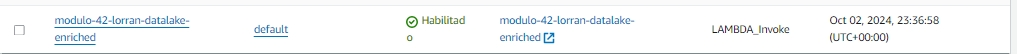

<a id='apres'></a>
## 4. Apresentação
Nesta fase os dados são disponibilizados para os usuários finais, como analistas e cientistas de dados, e para sistemas de consulta, como dashboards e motores de consulta. Geralmente, as informações são acessadas por meio de ferramentas de consulta, como *SQL*, sendo esta a principal interface para a maioria dos usuários. Nesse contexto, a etapa de apresentação utiliza o *AWS Athena*, uma ferramenta com motor de consulta *SQL*, simplificando a leitura e visualização dos dados armazenados na camada *ETL* para análises eficazes.

### 4.1 AWS Athena
O *AWS Athena* é um serviço de consulta interativa que permite analisar dados armazenados no Amazon S3 usando SQL padrão. Ele elimina a necessidade de carregar dados para um banco de dados permitindo explorar grandes conjuntos de dados de maneira fácil e flexível, obtendo insights valiosos sem a necessidade de infraestrutura prévia ou complexos processos de gerenciamento de dados. É especialmente útil em cenários de *Big Data* e *Data Lakes*, como no nosso caso, proporcionando uma abordagem ágil para análise de dados na nuvem. É o meio escolhido para este projeto, para visualizar e analisar as informações armazenadas.

*fonte: https://docs.aws.amazon.com/athena/latest/ug/what-is.html*

**Criação da tabela SQL **



```sql
CREATE EXTERNAL TABLE `telegram`(
  `message_id` bigint,
  `user_id` bigint,
  `user_is_bot` boolean,
  `user_first_name` string,
  `chat_id` bigint,
  `chat_type` string,
  `text` string,
  `date` bigint)
PARTITIONED BY (
  `context_date` date)
ROW FORMAT SERDE
  'org.apache.hadoop.hive.ql.io.parquet.serde.ParquetHiveSerDe'
STORED AS INPUTFORMAT
  'org.apache.hadoop.hive.ql.io.parquet.MapredParquetInputFormat'
OUTPUTFORMAT
  'org.apache.hadoop.hive.ql.io.parquet.MapredParquetOutputFormat'
LOCATION
  's3://<bucket>/telegram/'

Precisamos excecutar o comando SQL

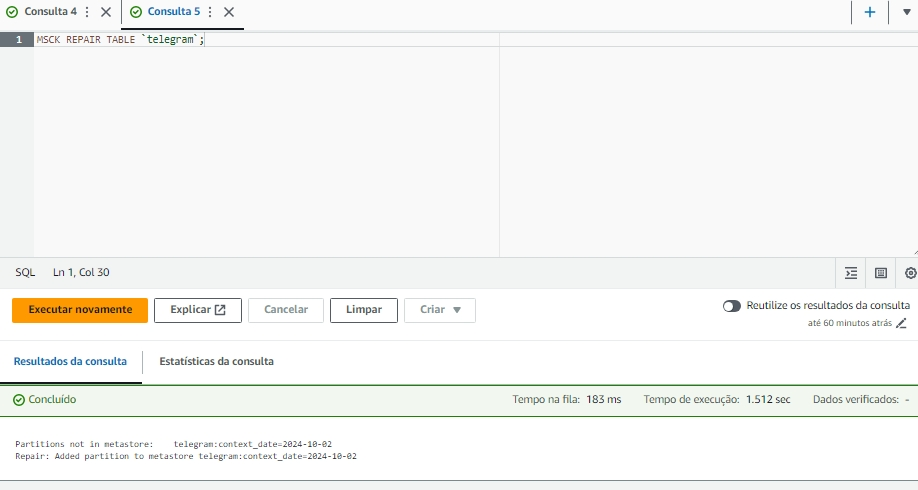

A consulta SQL a seguir foi projetada para validar a criação bem-sucedida de uma das tabelas em nosso banco de dados. Além disso, ela confirma se os dados particionados foram corretamente capturados, armazenados e depois recuperados no serviço S3. Esta verificação é crucial para garantir a integridade dos dados antes de prosseguirmos com qualquer análise adicional.

```sql
SELECT * FROM telegram;
```


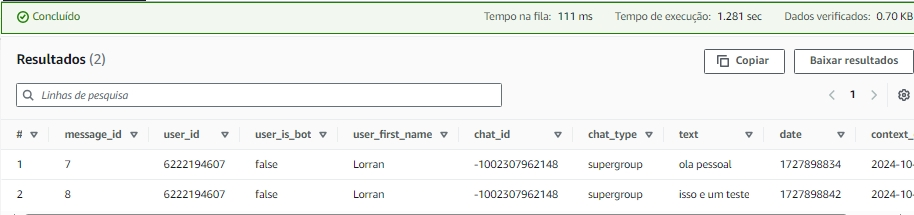

### 4.2 Análise Exploratória de Dados com SQL

- Quantidade de mensagens por dia.

```sql
SELECT
  context_date,
  count(1) AS "message_amount"
FROM "telegram"
GROUP BY context_date
ORDER BY context_date DESC
```

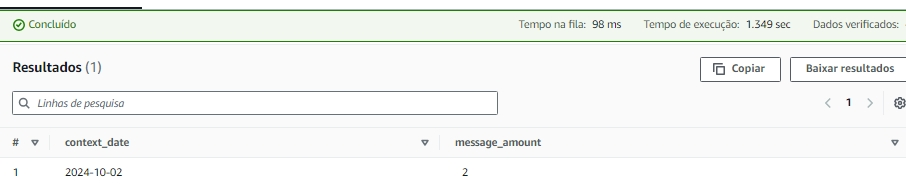

- Quantidade de mensagens por usuário por dia.

```sql
SELECT
  user_id,
  user_first_name,
  context_date,
  count(1) AS "message_amount"
FROM "telegram"
GROUP BY
  user_id,
  user_first_name,
  context_date
ORDER BY context_date DESC
```

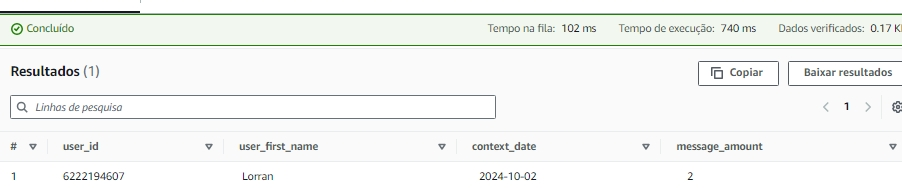

- Média do tamanho das mensagens por usuário por dia

```sql
SELECT
  user_id,
  user_first_name,
  context_date,
  CAST(AVG(length(text)) AS INT) AS "avg_message_length"
FROM "telegram"
GROUP BY
  user_id,
  user_first_name,
  context_date
ORDER BY context_date DESC
```

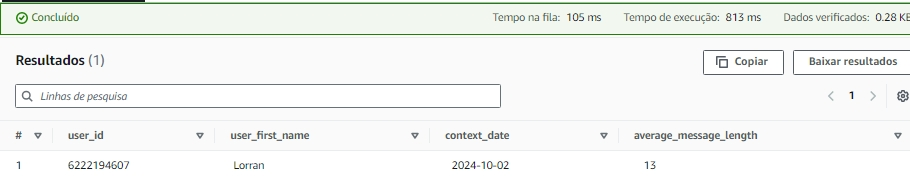

- Quantidade de mensagens por hora por dia da semana por número da semana.

```sql
WITH
parsed_date_cte AS (
    SELECT
        *,
        CAST(date_format(from_unixtime("date"),'%Y-%m-%d %H:%i:%s') AS timestamp) AS parsed_date
    FROM "telegram"
),
hour_week_cte AS (
    SELECT
        *,
        EXTRACT(hour FROM parsed_date) AS parsed_date_hour,
        EXTRACT(dow FROM parsed_date) AS parsed_date_weekday,
        EXTRACT(week FROM parsed_date) AS parsed_date_weeknum
    FROM parsed_date_cte
)
SELECT
    parsed_date_hour,
    parsed_date_weekday,
    parsed_date_weeknum,
    count(1) AS "message_amount"
FROM hour_week_cte
GROUP BY
    parsed_date_hour,
    parsed_date_weekday,
    parsed_date_weeknum
ORDER BY
    parsed_date_weeknum,
    parsed_date_weekday
```


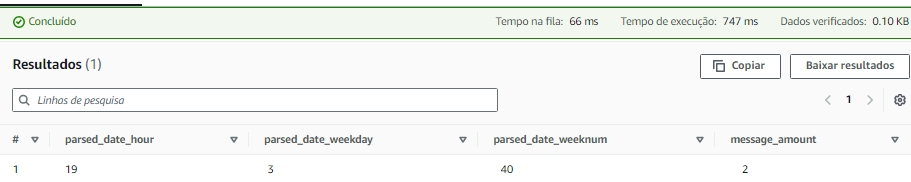

<a id='conclu'></a>
## 5. Conclusão

A integração do Telegram com a análise de dados e o uso de plataformas em nuvem, como a AWS, oferece uma vantagem competitiva significativa para as empresas. O Telegram, com sua interface intuitiva e disponibilidade ininterrupta, facilita a comunicação eficiente entre empresas e clientes. Ao empregar a AWS, essa comunicação é otimizada, permitindo escalabilidade instantânea e flexibilidade no gerenciamento de recursos conforme a demanda flutua.

Com pipelines de dados na nuvem, o processo de análise se torna ainda mais robusto, oferecendo capacidade para processar grandes volumes de dados e garantir armazenamento seguro. Isso possibilita a geração de insights precisos e detalhados, fundamentais para entender melhor o comportamento dos usuários e aprimorar estratégias de negócios.

Outro benefício importante é a redução de custos operacionais, uma vez que a nuvem elimina a necessidade de investimentos em infraestrutura física. Essa flexibilidade permite uma rápida adaptação a mudanças nas necessidades do mercado, assegurando uma operação ágil e eficiente. A segurança dos dados é uma prioridade, especialmente quando se lida com informações confidenciais de clientes. As soluções em nuvem, como a AWS, oferecem protocolos avançados de proteção contra ataques cibernéticos.

Em conclusão, a combinação entre Telegram, análise de dados e plataformas em nuvem oferece uma abordagem integrada que melhora a experiência do usuário, otimiza a operação das empresas e proporciona insights valiosos para decisões estratégicas. O uso de pipelines de dados reforça a capacidade das empresas em se manterem competitivas, inovando e entregando resultados com excelência.






